In [22]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import xgboost as xgb
from xgboost import plot_importance

import shap
shap.initjs()

from sklearn.metrics import accuracy_score,confusion_matrix

In [3]:
#import dataset
data = pd.read_csv("../data/abalone.data",
                  names=["sex","length","diameter","height","whole weight",
                         "shucked weight","viscera weight","shell weight","rings"])

y = data['rings']
X = data.drop('rings', axis=1)

#Create dummy variables
X['sex.M'] = [1 if s == 'M' else 0 for s in X['sex']]
X['sex.F'] = [1 if s == 'F' else 0 for s in X['sex']]
X['sex.I'] = [1 if s == 'I' else 0 for s in X['sex']]
X = X.drop('sex', axis=1)

print(len(data))
X.head()

4177


,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,sex.M,sex.F,sex.I
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,1,0,0
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,1,0,0
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,0,1,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,1,0,0
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,0,0,1


In [4]:
#Train model
model = xgb.XGBRegressor(objective="reg:squarederror") 
model.fit(X, y)

#Get predictions
y_pred = model.predict(X)

Text(0.5, 0, 'Actual')

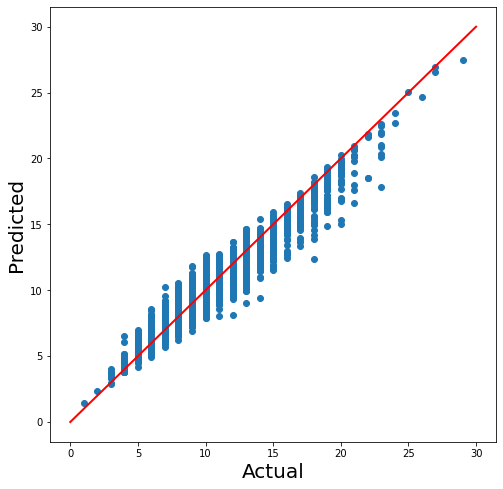

In [6]:
#Model evaluation
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(8,8))

plt.scatter(y,y_pred)
plt.plot([0, 30], [0, 30], color='r', linestyle='-', linewidth=2)

plt.ylabel('Predicted',size=20)
plt.xlabel('Actual',size=20)

#plt.savefig(path.format('regression_evaluation.png'),dpi=200,bbox_inches='tight')

In [8]:
shap_interaction = shap.TreeExplainer(model).shap_interaction_values(X)

In [17]:
pd.DataFrame(shap_interaction[0])

,0,1,2,3,4,5,6,7,8,9
0,-0.189966,-0.008239,0.159382,0.258326,0.107976,-0.079013,0.117757,0.008589,-0.002070,0.003937
1,-0.008239,0.001186,0.046868,0.078409,0.295737,0.039778,0.037995,-0.005197,-0.000691,0.015579
2,0.159382,0.046867,-0.209623,0.237510,-0.040167,-0.126381,0.232404,-0.003966,-0.000989,-0.007973
3,0.258326,0.078409,0.237510,-0.826729,-0.096501,-0.068688,0.259911,-0.017585,-0.007307,-0.030761
4,0.107976,0.295737,-0.040167,-0.096501,1.682119,0.017617,-0.226582,0.011448,-0.025818,0.081309
5,-0.079013,0.039778,-0.126381,-0.068688,0.017617,0.193086,0.123005,0.007937,-0.006369,0.015798
6,0.117758,0.037996,0.232404,0.259911,-0.226582,0.123005,-1.166347,-0.005187,0.025401,0.125194
7,0.008589,-0.005197,-0.003966,-0.017585,0.011448,0.007937,-0.005187,0.007471,0.000000,0.000000
8,-0.002069,-0.000691,-0.000989,-0.007307,-0.025818,-0.006368,0.025401,0.000000,-0.041518,0.000000
9,0.003937,0.015579,-0.007973,-0.030761,0.081310,0.015798,0.125194,0.000000,0.000000,0.187849


In [34]:
mean_interaction = np.abs(shap_interaction).mean(0)
mean_interaction = pd.DataFrame(mean_interaction)

<AxesSubplot:>

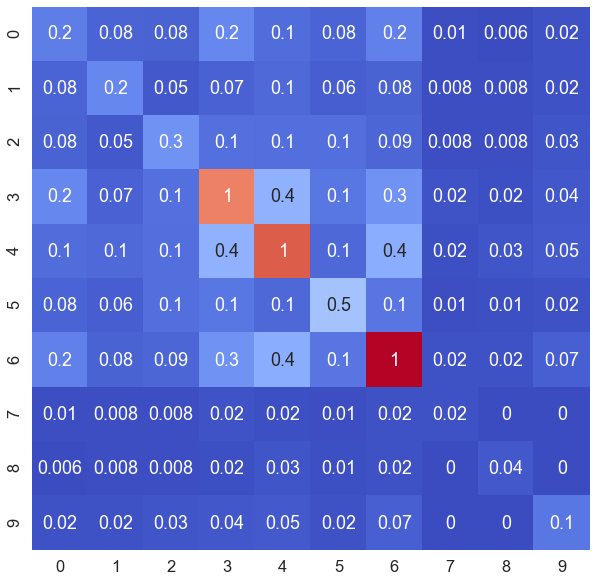

In [35]:
plt.figure(figsize=(10, 10), facecolor='w', edgecolor='k')
sns.set(font_scale=1.5)
sns.heatmap(mean_interaction,cmap='coolwarm',annot=True,fmt='.1g',cbar=False)


In [ ]:
for i in range(tmp.shape[0]):
    tmp[i,i] = 0
inds = np.argsort(-tmp.sum(0))[:50]
tmp2 = tmp[inds,:][:,inds]
pl.figure(figsize=(12,12))
pl.imshow(tmp2)
pl.yticks(range(tmp2.shape[0]), X.columns[inds], rotation=50.4, horizontalalignment="right")
pl.xticks(range(tmp2.shape[0]), X.columns[inds], rotation=50.4, horizontalalignment="left")
pl.gca().xaxis.tick_top()
pl.show()

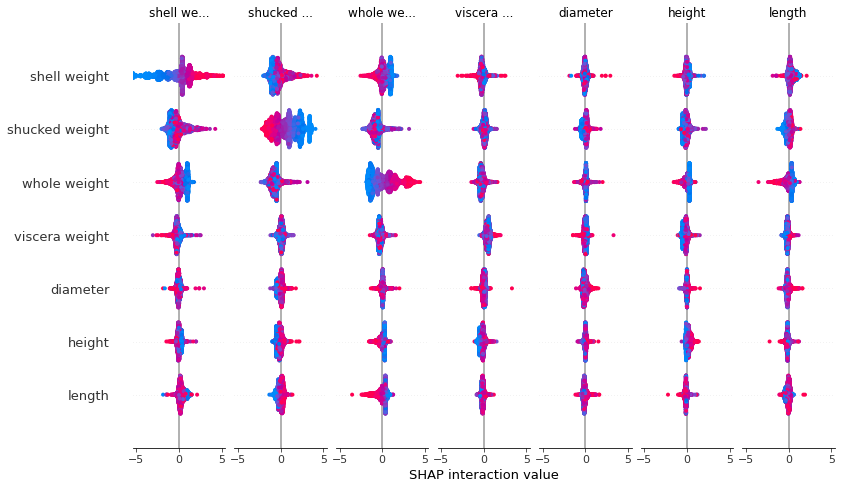

In [12]:
shap.summary_plot(shap_interaction, X)

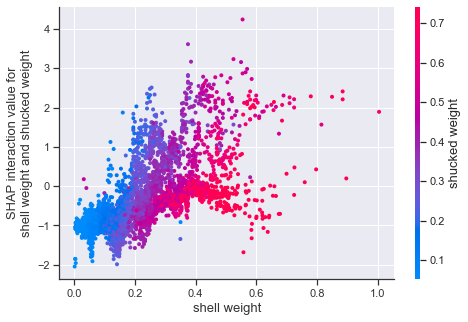

In [33]:
shap.dependence_plot(
    ("shell weight", "shucked weight"),
    shap_interaction, X,
    display_features=X
)